# Copy of CISC-873-DM-W23-A4
## Airbnb price category prediction

https://www.kaggle.com/competitions/copy-of-cisc-873-dm-w23-a4

## ✔️ Problem Formulation:

* **Define the problem?**


the problem is when people prepare to post 
a new listing on airbnb is, how much should one ask for? 
so we are going to predict the listing price based on the 
listing characteristics and some images (In this problem, 
the task is to determine an appropriate listing price for 
a new listing on Airbnb. Instead of predicting the actual 
listing price using regression, the objective is to predict 
which pricing bin or range is appropriate for a new listing. 
A multi-objective approach is used to predict the price range 
of a new listing, along with the type of rental being advertised. 
To do so, a multi-modality approach is also applied, whereby 
images of a listing along with an accompanying text 
summary are used for training.)
* **What is the input?**


the input is images for different type of buildings (house,apartment and so on )
with its description 

* **What is the output?**


the output is predict type and price based on the input image and sammry 

* **What data mining function is required?**


In this problem we use to make classification so i used softmax 
as activation function to make classification

* **What could be the challenges?**


the challenges is data has alot of noise and the images not same size 
so we should do some preprocessing before using this data 
text data has mulible languages so it need to be translated 

* **What is the impact?**


the impact is optimize user experience and lower the bar to be a new host


* **What is an ideal solution?**


the ideal solution for this problem that model predict price and type 
for any new post perfectly and gets optimal accuracy



## ✔️ Answer the questions below (briefly):


**1-Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

- yes :  

because A fully connected neural network consists of a series of fully connected layers. A fully connected layer is a function from ℝ m to ℝ n . Each output dimension depends on each input dimension.
Fully connected neural networks are good enough classifiers, however they aren't good for feature extraction. so its not good for image
CNNs are trained to identify and extract the best features from the images for the problem at hand. That is their main strength. The latter layers of a CNN are fully connected because of their strength as a classifier.

 because‬:  RNNs are better suited to analyzing temporal, sequential data, such as text or videos. A CNN has a different architecture from an RNN. CNNs are "feed-forward neural networks" that use filters and pooling layers, whereas RNNs feed results back into the network

- No :

Fully connected neural networks aren't good for feature extraction.so its not good for image 
and fully-connected model is not appropriate when our model or one of our layers has more than one input or output, we need to do layer sharing or we want to use a non-linear topology e.g. residual or skip-connection


so CNNs are trained to identify and extract the best features from the images for the problem at hand. That is their main strength. The latter layers of a CNN are fully connected because of their strength as a classifier


---


**2-What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

- In a network of n hidden layers, n derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. Alternatively, if the derivatives are small then the gradient will decrease exponentially as we propagate through the model until it eventually vanishes, and this is the vanishing gradient problem.`

`-Vanishing Gradient occurs when the derivative or slope will get smaller and smaller as we go backward with every layer during backpropagation.

-Exploding gradient occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation. This situation is the exact opposite of the vanishing gradients.


-LSTMs solve the problem using a unique additive gradient structure that includes direct access to the forget gate's activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process



LSTM (short for long short-term memory) primarily solves 
the vanishing gradient problem in backpropagation. 
LSTMs use a gating mechanism that controls the memoizing process. 
LSTM ’s and GRU’s were created as the solution to short-term memory. 
They have internal mechanisms called gates that can regulate the flow of information.

---

**3-What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**

-Multi-task Learning (MTL) is a collection of techniques intended to learn multiple tasks simultaneously instead of learning them separately.

-Multitasking refers to either the ability to pay attention to several pieces of information at the same time or the process of performing more than one task at the same time

Multi-task learning (MTL) is a subfield of machine learning 
in which multiple learning tasks are solved at the same time, 
while exploiting commonalities and differences across tasks


-multi-objective to achieve multiple targets in this assignment like predict price and type

-Multimodal machine learning aims to build models that can process and relate information from multiple modalities.

- in this assignment we use one model to work on text and image at the same time Inputs (two modalities): (text data) (image data)

---


**4-What is the difference among xgboost, lightgbm and catboost**

-XGBoost, CatBoost, and LightGBM have emerged as the most optimized boosting techniques for gradient-boosted tree algorithms

XGBoost:

XGBoost cannot handle categorical
features by itself, it only accepts numerical values similar
to Random Forest. Therefore one has to perform various encodings
like label encoding, mean encoding or one-hot encoding before
supplying categorical data to XGBoost

CatBoost:

CatBoost has the flexibility of giving indices of categorical 
columns so that it can be encoded as one-hot encoding 
using one_hot_max_size (Use one-hot encoding for all 
features with number of different values less than or equal 
to the given parameter value)


LightGBM:

Similar to CatBoost, LightGBM can also handle categorical 
features by taking the input of feature names. 
It does not convert to one-hot coding, and is much faster than 
one-hot coding. LGBM uses a special algorithm to find the split value of categorical features

### **What is the experimental protocol used and how was it carried out?**


the training and test datasets for a set of rental 
properties are loaded into pandas dataframes. Images are 
loaded as greyscale (2 channels), and re-sized into size 64x64x2. 
Text summaries are also loaded as strings.



Then, the text data is preprocessed by first fitting a 
tokenizer on all of the text summaries. This creates a 
vocabulary of 40000 unique words. This tokenizer is used 
to generate a sequence of integers for each summary using 
this vocabulary. A max sequence length of 100 words is enforced 
to truncate long sequences, and to pad shorter sequences with zeros 
to maintain consistent input dimensions.

Embeddings are generated for the input text, and the average of the embeddings is computed for each sequence. A feature vector is created for the input images by passing their values through a 2D convolutional layer, using 2D max-pooling to reduce the size, and then flattening that output. These output vectors are concatenated and passed to a dense layer using softmax activation to perform separate multi-class classification tasks on price and type labels

## Import Libraries

In [100]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used to create a hold-out set for validation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint
import re # regax library
#stop-words
import nltk
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))
# tokenizing
from nltk import word_tokenize,sent_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
from translate import Translator

from __future__ import absolute_import, division, print_function, unicode_literals 
import collections
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout , Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import LSTM , GRU # bringing an LSTM layer into the fold
from tensorflow.keras.layers import Bidirectional # used to implement bidirectional RNNs (LSTM, GRU)
from tensorflow.keras.layers import MultiHeadAttention , GlobalAveragePooling2D, Rescaling

from keras.applications.vgg16 import VGG16
# !pip install plot_keras_history
from plot_keras_history import plot_history  # use plot_keras_history to plot the history

# Data exploration

In [2]:
xy_train_df = pd.read_csv('train_xy.csv') # reading our training features and labels into a df
x_test_df = pd.read_csv('test_x.csv') # reading test features into a df

In [3]:
xy_train_df.head(2)

summary            image  \
0  Spacious, sunny and cozy modern apartment in t...  img_train/0.jpg   
1  Located in one of the most vibrant and accessi...  img_train/1.jpg   

        type  price  
0  Apartment      1  
1  Apartment      0

image column is the whole path to the images

In [4]:
x_test_df.head(2)

id                                            summary           image
0   0  Charming warm house is ready to host you here ...  img_test/0.jpg
1   1  La chambre est spacieuse et lumineuse, dans un...  img_test/1.jpg

In [5]:
# anything missing?
xy_train_df.isnull().sum().sort_values(ascending=False)

summary    301
image        0
type         0
price        0
dtype: int64

<AxesSubplot:>

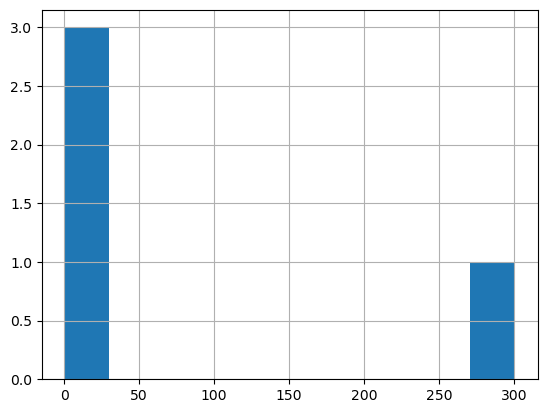

In [6]:
xy_train_df.isnull().sum().hist()

<AxesSubplot:>

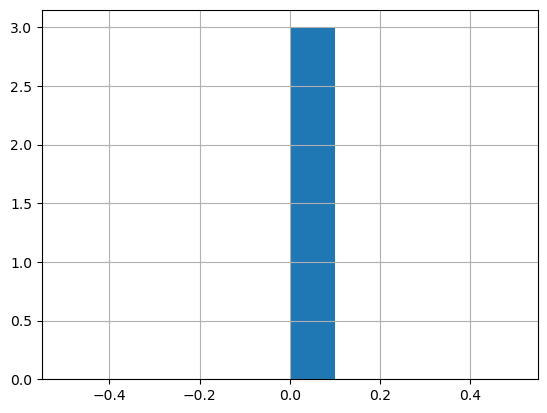

In [7]:
x_test_df.isnull().sum().hist()

<AxesSubplot:>

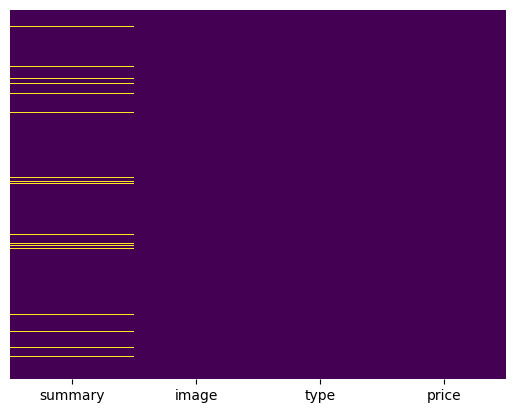

In [8]:
# plot the amount of missing values in the train features.
sns.heatmap(xy_train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#counts the null vaalues in each column from the highest to the lowest in train data
total = x_test_df.isnull().sum().sort_values(ascending=False) 
total

id         0
summary    0
image      0
dtype: int64

In [10]:
#counts the null vaalues in each column from the highest to the lowest in train data
total = xy_train_df.isnull().sum().sort_values(ascending=False) 
total

summary    301
image        0
type         0
price        0
dtype: int64

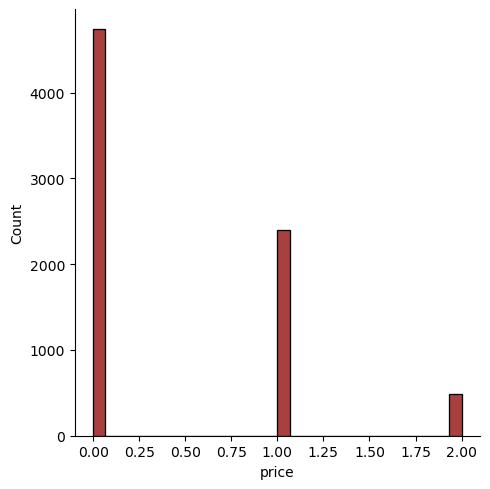

In [11]:
sns.displot(xy_train_df['price'].dropna(),kde=False,color='darkred',bins=30)

### Visualizing numeric values

In [12]:
df_numeric = xy_train_df.select_dtypes(include=np.number)
df_numeric.columns

Index(['price'], dtype='object')

In [13]:
# # co-relation
import plotly.express as px
fig1 = px.imshow(df_numeric.corr())
fig1.show()

### Visualizing categorical columns

In [14]:
df_categorical = xy_train_df.select_dtypes(include =['object'])
df_categorical.columns

Index(['summary', 'image', 'type'], dtype='object')

In [15]:
# dataframe.info(verbose,buf=buffer,max_cols,memory_usage,show_counts,null_counts)
xy_train_df.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True)  #Investigating data
xy_train_df.info()  #another way without using parameters of df.info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


<AxesSubplot:xlabel='price', ylabel='count'>

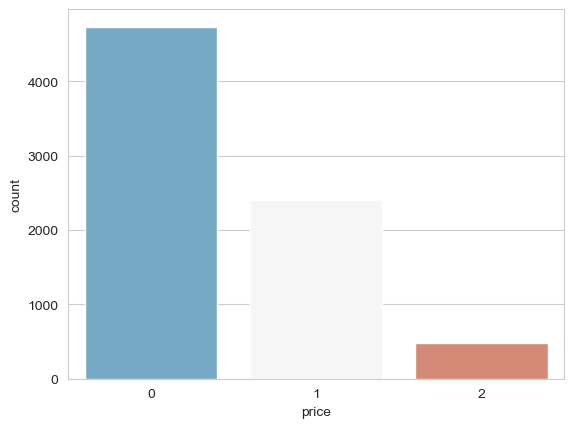

In [16]:
# the count of the real news vs not rreal
sns.set_style('whitegrid')
sns.countplot(x='price', data=xy_train_df,palette='RdBu_r')

In [17]:
xy_train_df.head(2)

summary            image  \
0  Spacious, sunny and cozy modern apartment in t...  img_train/0.jpg   
1  Located in one of the most vibrant and accessi...  img_train/1.jpg   

        type  price  
0  Apartment      1  
1  Apartment      0

##### 2 inputs (x): summary and image . 2 outputs (y): type and price

In [18]:
# preprocess image data

def load_image(file):
    try:
        image = Image.open(file).convert('LA').resize((64, 64)) # read each image as a greyscale(convert('LA')) image size (64x64x2)
        arr = np.array(image) # convert each image to an array
    except:
        arr = np.zeros((64, 64, 2)) # if an image can't be loaded, return an array of zeros (same size: 64x64x2)
    return arr


# loading images:
x_image = np.array([load_image(i) for i in tqdm(xy_train_df.image)]) # load each image from the provided directory using the function created above

# loading summary: (force convert some of the non-string cell to string)
x_text = xy_train_df.summary.astype('str') # also load the summary text accompanying each image, force convert to strings in cases where the encoding 

  0%|          | 0/7627 [00:00<?, ?it/s]

In [19]:
translator = Translator(to_lang='en') #show data before translate 

In [20]:
x_text= x_text.apply(lambda x: translator.translate(x))
#the data has multi language so i will translate it to english

In [21]:
#create function to clean data and remove stop words
def clean_text(text, for_embedding=False):

    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) #ignore white space 
    RE_TAGS = re.compile(r"<[^>]+>")#remove tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)#remove ascii code
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)#remove singe char
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [22]:
x_text= x_text.apply(clean_text)#apply function on text

# Preprocess image data

In [23]:
x_image.shape

(7627, 64, 64, 2)

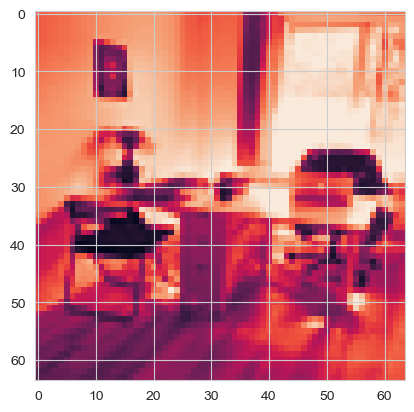

In [24]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(x_image[5, :, :, 0])  # image number 5
# displaying a sample image, pyplot uses a default cmap

#### Split the Data

In [25]:
xy_train_df.dtypes

summary    object
image      object
type       object
price       int64
dtype: object

In [26]:
# labels:
y_price = xy_train_df.price 
# price category/label, either 0, 1, or 2 corresponding to beginner, plus, or premium respectively
y_type = xy_train_df.type.astype('category').cat.codes # Return Series of codes as well as the index.
# rental type label, categorically encode 24 available property types (i.e. hotel, apartment, villa, boat, etc.)

In [27]:
y_type.unique()

array([ 1, 17, 22, 10, 18, 20,  5,  2,  8,  4, 23, 13, 15, 16, 14, 11, 19,
        0, 21,  3,  6, 12,  7,  9], dtype=int8)

In [28]:
len_price = len(y_price.unique()) # number of unique labels for price (3)
len_type = len(y_type.unique()) # number of unique labels for rental type (24)
print('unique values for price category is', len_price, y_price.unique()) # print them so we can see the unique values for our labels
print('unique values for type category is', len_type, y_type.unique())

unique values for price category is 3 [1 0 2]
unique values for type category is 24 [ 1 17 22 10 18 20  5  2  8  4 23 13 15 16 14 11 19  0 21  3  6 12  7  9]


In [29]:
# creates training and validation splits for our image and text feature spaces
# along with our two label sets, price and rental type

x_tr_image, x_vl_image, y_tr_price, y_vl_price = train_test_split( x_image, y_price, test_size=0.2, random_state=42)
x_tr_text, x_vl_text, y_tr_type, y_vl_type = train_test_split( x_text, y_type, test_size=0.2, random_state=42)
# our validation splits are a hold-out set containing 20% of the training set

In [30]:
print(np.shape(x_tr_image)) # 6101 training images of size (64x64x2)
print(np.shape(x_vl_image)) # 1526 validation images of size (64x64x2)
print(np.shape(y_tr_price)) # 6101 price labels for training
print(np.shape(y_vl_price)) # 1526 price labels for validation
print('-------')
print('-------')

print(np.shape(x_tr_text)) # 6101 text inputs for training
print(np.shape(x_vl_text)) # 1526 text inputs for validation
print(np.shape(y_tr_type)) # 6101 type labels for training
print(np.shape(y_vl_type)) # 1526 type labels for validation
# note also that there are also 6101 text samples for training and 1526 text samples for validation

(6101, 64, 64, 2)
(1526, 64, 64, 2)
(6101,)
(1526,)
-------
-------
(6101,)
(1526,)
(6101,)
(1526,)


##### 2 inputs (x): summary (text) and image . 2 outputs (y): type and price

# Preprocess text data
tokenization and converting to integer IDs

In [31]:
# preprocess text data

vocab_size = 40000 # enforce a threshold on the number of unique words that are tokenized
max_len = 100 # maximum sequence length of a text string, anything longer will be truncated to 100 words


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size) # initialize tokenizer with a vocabulary size of 40000
tokenizer.fit_on_texts(x_tr_text) # update the vocabulary by fitting on the corpus of text contained in rental text descriptions, keeping only the most common 40000 words


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text), # transforms each list entry to a sequence of integers based on the vocabulary created from fitting the tokenizer on the training set above
        maxlen=max_len, # enforce max sequence length of 100
        padding='post', # if a sequence length is less than 100, add padding at the end to make it 100 words long
    )
    

# padding is done inside: 
x_tr_text_id = _preprocess(x_tr_text) # preprocess and tokenize list of training sequences
x_vl_text_id = _preprocess(x_vl_text) # preprocess and tokenize list of validation sequences

# our 6101 training and 1526 validation text samples have been tokenized to match the maximum sequence length of 100
print(x_tr_text_id.shape)
print(x_vl_text_id.shape)

(6101, 100)
(1526, 100)


In [32]:
# printing the first 5 text sequences based on their tokenized form, essentially
# a lookup to show that the input sequences have been tokenized properly 
pprint(tokenizer.sequences_to_texts(x_tr_text_id[:5]))

['one bedroom locat villag min walk downtown open space calm bedroom locat '
 'semi build histor build apart sleep comfort peopl queen size bed super '
 'confort sofa bed linen towel provid access fulli equip well stock kitchen '
 'free wifi provid',
 'présentement en rénovat des photo seront bientôt ajout besoin un espac pour '
 'venir vous repos',
 'est un réel plaisir de vous recevoir dan notr confort logement lumineux '
 'spacieux et soigné au ièm étage un duplex un espac simpl et san prétention '
 'un environn calm et repos un quartier sympathiqu très famili direct sur le '
 'coin station bixi pist cyclabl et autobus métros jean talon et fabr environ '
 'minut pie marché jean talon km et la petit itali environ minut pie le centr '
 'vill minut en voitur ou en métro',
 'bel appart emplac idéal mn du métro mont royal épiceri et supermarché '
 'proximité chambr avec fenêtr donnant sur ruell arrièr avec blacon pas de '
 'bruit quartier chaleureux avec beaucoup de commerc restaur bar e

In [33]:
# number of unique words contained in the vocabulary
print('Total number of words in the dictionary is', tokenizer.num_words)

Total number of words in the dictionary is 40000


- Text inputs. Cover at least once a GRU/LSTM layer.
- Text inputs. Cover at least once a BiDirectional layer.
- Image inputs. Cover at least once a Conv2d layer.
- Image inputs. Cover at least once a Dropout layer.
- Multi-modality learning. Cover at least once a multi-modality (text+image) model.
- Multi-objective learning. Cover at least once a multi-objective model (predicting both price and type).

# Trail 1

Adding LSTM layer

## Building a Learning model

I used Conv2d layer in my model archticture , and this trial is Multi-modality and Multi-objective learning

In [34]:
in_text = keras.Input(batch_shape=(None, max_len)) #  (100 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1) #reduce the rank of the embedding by computing its mean 


# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape to (288,)


# fusion:
fused = tf.concat([averaged, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [35]:
# model definition
model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

# compile model
model.compile(
    optimizer=Adam(), # using Adam for optimization
    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    # equally weight the loss w.r.t. both labels
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    # again, our labels are categorical integers, so we use sparse categorical accuracy
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

In [36]:
model.summary() # print the structure of the model defined above 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

## Model Training

Based on the training/validation performance, we can adjust the epochs to be trained. Early stoping is watching the validation loss on genre prediction.

In [37]:
# fitting the model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_tr_text_id,
        'image': x_tr_image
    },
    # our outputs: price and rental type categories
    y={
        'price': y_tr_price,
        'type': y_tr_type,
    },
    epochs=20, # train 20 epochs (
    batch_size=16, # (samples processed before updating gradients)
    # our validation splits for our two input sets and our two target attributes
    validation_data=(
        {
            'summary': x_vl_text_id,
            'image': x_vl_image
         }, 
        {
            'price': y_vl_price,
            'type': y_vl_type,
        }),
    validation_split=0.2, # validate on a hold-out set of 20%,
    # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1 # one line per epoch displaying performance metrics
)

Epoch 1/20
382/382 [==============================] - 16s 40ms/step - loss: 20.3957 - price_loss: 16.4711 - type_loss: 24.3203 - price_sparse_categorical_accuracy: 0.5052 - type_sparse_categorical_accuracy: 0.5842 - val_loss: 6.6541 - val_price_loss: 5.2158 - val_type_loss: 8.0923 - val_price_sparse_categorical_accuracy: 0.5491 - val_type_sparse_categorical_accuracy: 0.6245
Epoch 2/20
382/382 [==============================] - 16s 42ms/step - loss: 6.8485 - price_loss: 4.7139 - type_loss: 8.9831 - price_sparse_categorical_accuracy: 0.5175 - type_sparse_categorical_accuracy: 0.5935 - val_loss: 10.3931 - val_price_loss: 7.9530 - val_type_loss: 12.8332 - val_price_sparse_categorical_accuracy: 0.4895 - val_type_sparse_categorical_accuracy: 0.3473
Epoch 3/20
382/382 [==============================] - 16s 42ms/step - loss: 6.7991 - price_loss: 5.5807 - type_loss: 8.0176 - price_sparse_categorical_accuracy: 0.5217 - type_sparse_categorical_accuracy: 0.5988 - val_loss: 5.4296 - val_price_loss:

## Data Preprocessing (Testing)

From the DataFrame at the beginning: x_test_df

In [39]:
x_test_df=x_test_df.apply(lambda x: translator.translate(x))#translate test sammary

In [42]:
x_test_summary= x_test_df.summary.apply(clean_text)#apply clean function to text in test data 

In [43]:
x_test_summary = _preprocess(x_test_summary.astype(str)) # create sequences for the text summaries in the test set
x_test_image = np.array([load_image(i) for i in tqdm(x_test_df.image)]) # load and resize the images from the test set

  0%|          | 0/7360 [00:00<?, ?it/s]

## Prediction

We can use the model to predict the testing samples.

In [44]:
# generate predictions on the test set using the tokenized summaries and re-sized images
y_predict = model.predict(
    {
        'summary': x_test_summary,
        'image': x_test_image
    }
)

price_predicted = y_predict['price'] # this is the target attribute we care about for this task
print(price_predicted) # probability the sample belongs to each of the categories
price_category_predicted = np.argmax(price_predicted, axis=1) # pick the highest value, and assign it as the predicted class
print(price_category_predicted) # print the categorical predictions, which are in [0,1,2]

# create the submission dataframe/csv for submission
pd.DataFrame(
    {'id': x_test_df.id , 'price': price_category_predicted}).to_csv('trail 1.csv', index=False)

230/230 [==============================] - 2s 7ms/step
[[1.0000000e+00 8.4984450e-11 7.2808608e-29]
 [9.9999368e-01 6.3392108e-06 3.6655463e-24]
 [5.9971577e-01 4.0028399e-01 1.8636618e-07]
 ...
 [9.8347259e-01 1.6482998e-02 4.4385350e-05]
 [5.6786314e-02 9.4321370e-01 9.5605859e-17]
 [8.4003039e-02 9.1599703e-01 9.2716460e-11]]
[0 0 0 ... 0 1 1]


### Helper functions


In [45]:
# used to plot history after training

def results_viz(history):

    # generate a figure containing 3 plots displayed horizontally
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    fig.suptitle('Model Results')

    # first we display the training price accuracy vs. the validation price accuracy
    ax1.plot(history.history['price_sparse_categorical_accuracy'])
    ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
    ax1.set_title('price accuracy')
    ax1.set_ylabel('accuracy')
    ax1.set_xlabel('epoch')
    ax1.legend(['train_price', 'validation_price'], loc='upper left')

    # same with the other specified accuracy metric, type accuracy
    ax2.plot(history.history['type_sparse_categorical_accuracy'])
    ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
    ax2.set_title('type accuracy')
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['train_type', 'validation_type'], loc='upper left')

    # on the last axis, we plot the training loss against the validation loss (w.r.t. price and type combined)
    ax3.plot(history.history['loss'])
    ax3.plot(history.history['val_loss'])
    ax3.set_title('model loss')
    ax3.set_ylabel('loss')
    ax3.set_xlabel('epoch')
    ax3.legend(['train', 'validation'], loc='upper left')

    plt.show() # display the figure

In [46]:
# function to generate predictions on test set, use it and Submitt to Kaggle
def test(model, filename):
    y_predict = model.predict(
      {
          'summary': x_test_summary,
          'image': x_test_image
      }
  )
    price_predicted = y_predict['price'] 
    price_category_predicted = np.argmax(price_predicted, axis=1) 

    # create the submission dataframe/csv for submission to kaggle
    pd.DataFrame(
      {'id': x_test_df.id,
       'price': price_category_predicted} ).to_csv(f'{filename}.csv', index=False)

In [47]:
def compile(model, lr=0.001):
    
  # compile model
    model.compile(optimizer=Adam(learning_rate=lr), # using Adam for optimization
      # measuring sparse categorical cross-entropy loss for both price and type labels
      # sparse categorical cross-entropy is used since our labels are integers
    loss={
          'price': 'sparse_categorical_crossentropy',
          'type': 'sparse_categorical_crossentropy',
      },
      # equally weight the loss w.r.t. both labels
    loss_weights={
          'price': 0.5,
          'type': 0.5,       
      },
            # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
      # again, our labels are categorical integers, so we use sparse categorical accuracy
    metrics={
          'price': ['SparseCategoricalAccuracy'],
          'type': ['SparseCategoricalAccuracy'], })

In [48]:
def train(model, cbs, epochs=20, batch=16):
    
    # fit our model on our training data
    history = model.fit(
      # our inputs: tokenized text sequences and resized image samples
    x={
          'summary': x_tr_text_id,
          'image': x_tr_image
      },
      # our outputs: price and rental type categories
    y={
          'price': y_tr_price,
          'type': y_tr_type,
      },
    epochs=epochs, # variable, number of iterations over all training data
    batch_size=batch, # variable batch size, samples processed before updating gradients
      # our validation splits for our two input sets and our two target attributes
    validation_data=(
          {'summary': x_vl_text_id,'image': x_vl_image}, 
          { 'price': y_vl_price,'type': y_vl_type,})    , 
        
        # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
    callbacks=cbs,
    verbose=1 # one line per epoch displaying performance metrics
    )
    return history

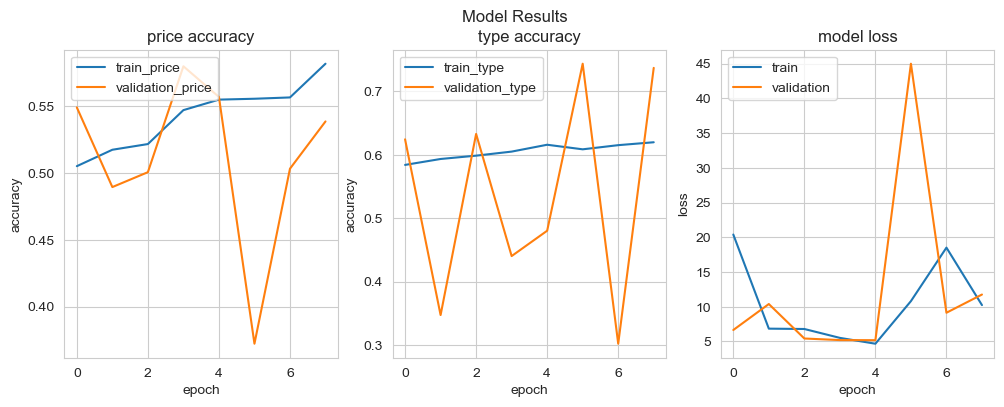

In [49]:
# let's look at the accuracy and loss curves from our first model
results_viz(history)

#### Try adding LSTM layer to the model

In [50]:
# copied the model from the template and modifying it here
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings

# only part I'm changing is adding an LSTM layer on top of the embedding layer instead of the averaging
lstm = LSTM(50)(embedded)

# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape to (288,)


# fusion:
fused = tf.concat([lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [51]:
# model definition
lstm_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

compile(lstm_model) # compiles the model with the helper function
lstm_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 32)   16416       ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 100)     4000000     ['input_3[0][0]']                
                                                                                            

In [52]:
# let's try training longer to see if a trend presents itself over time
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )]

history = train(lstm_model, callbacks) # use train helper function

Epoch 1/20
382/382 [==============================] - 20s 49ms/step - loss: 24.1774 - price_loss: 22.8511 - type_loss: 25.5036 - price_sparse_categorical_accuracy: 0.4986 - type_sparse_categorical_accuracy: 0.5894 - val_loss: 15.0640 - val_price_loss: 9.6040 - val_type_loss: 20.5240 - val_price_sparse_categorical_accuracy: 0.6003 - val_type_sparse_categorical_accuracy: 0.3716
Epoch 2/20
382/382 [==============================] - 20s 52ms/step - loss: 7.8564 - price_loss: 5.6350 - type_loss: 10.0778 - price_sparse_categorical_accuracy: 0.5107 - type_sparse_categorical_accuracy: 0.5925 - val_loss: 18.9091 - val_price_loss: 5.4981 - val_type_loss: 32.3201 - val_price_sparse_categorical_accuracy: 0.4941 - val_type_sparse_categorical_accuracy: 0.0144
Epoch 3/20
382/382 [==============================] - 20s 51ms/step - loss: 7.6821 - price_loss: 5.7569 - type_loss: 9.6073 - price_sparse_categorical_accuracy: 0.5078 - type_sparse_categorical_accuracy: 0.5971 - val_loss: 24.4992 - val_price_l

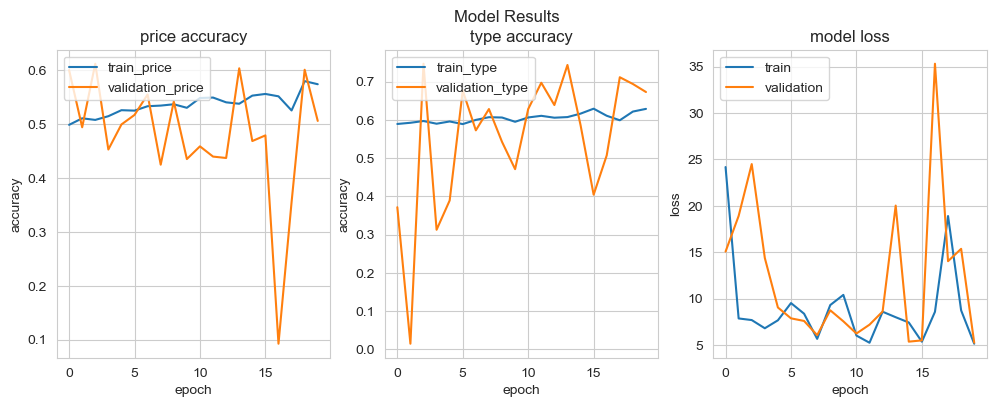

In [53]:
# looking at the curves below, we see a similar behaviour to the first one
# The model does not appear to be learning much, see the training curve.
results_viz(history)

In [54]:
# generate predictions and submit to Kaggle
test(lstm_model,'submission1')

230/230 [==============================] - 3s 14ms/step


## Observations

After submit the file to kaggle it got me 0.50407 as a public score , a very bad result.

Let's try another approach

# Trial 2
### Bi-directional Recurrent Layers (LSTM and GRU)

In [59]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm = Bidirectional(GRU(20))(embedded) # creating a bidirectional GRU layer, with 20 units as before

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [60]:
# model definition
bi_lstm_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [62]:
# compiling the bidirectional model and printing a summary of the architecture
compile(bi_lstm_model)
bi_lstm_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 32)   608         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [63]:
# training on 20 epochs, I increased the batch size to 32 to improve training speed
history = train(model=bi_lstm_model, cbs=callbacks, epochs=20, batch=32)

Epoch 1/20
191/191 [==============================] - 13s 55ms/step - loss: 12.7583 - price_loss: 11.7534 - type_loss: 13.7632 - price_sparse_categorical_accuracy: 0.5311 - type_sparse_categorical_accuracy: 0.5914 - val_loss: 3.0726 - val_price_loss: 2.6562 - val_type_loss: 3.4889 - val_price_sparse_categorical_accuracy: 0.5400 - val_type_sparse_categorical_accuracy: 0.6396
Epoch 2/20
191/191 [==============================] - 10s 51ms/step - loss: 2.5131 - price_loss: 2.1257 - type_loss: 2.9004 - price_sparse_categorical_accuracy: 0.5727 - type_sparse_categorical_accuracy: 0.6365 - val_loss: 2.6719 - val_price_loss: 2.3361 - val_type_loss: 3.0077 - val_price_sparse_categorical_accuracy: 0.5518 - val_type_sparse_categorical_accuracy: 0.6350
Epoch 3/20
191/191 [==============================] - 10s 54ms/step - loss: 1.6295 - price_loss: 1.4870 - type_loss: 1.7720 - price_sparse_categorical_accuracy: 0.6156 - type_sparse_categorical_accuracy: 0.6764 - val_loss: 1.9150 - val_price_loss: 1

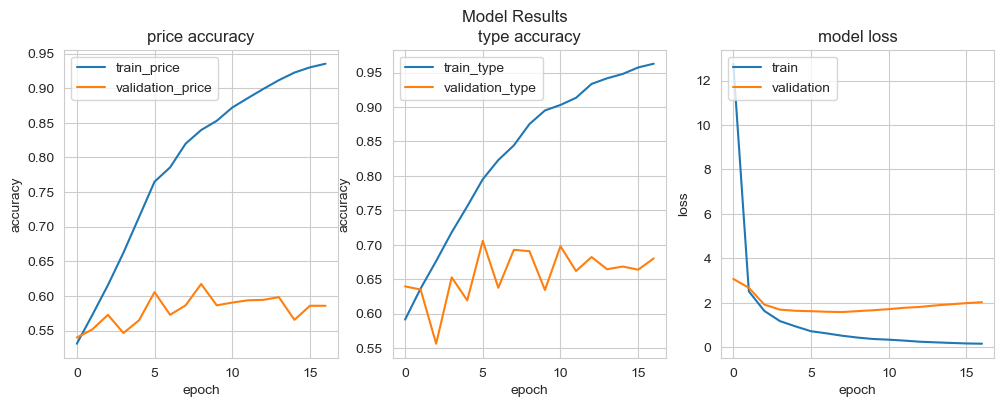

In [64]:
# Still overfitting 
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

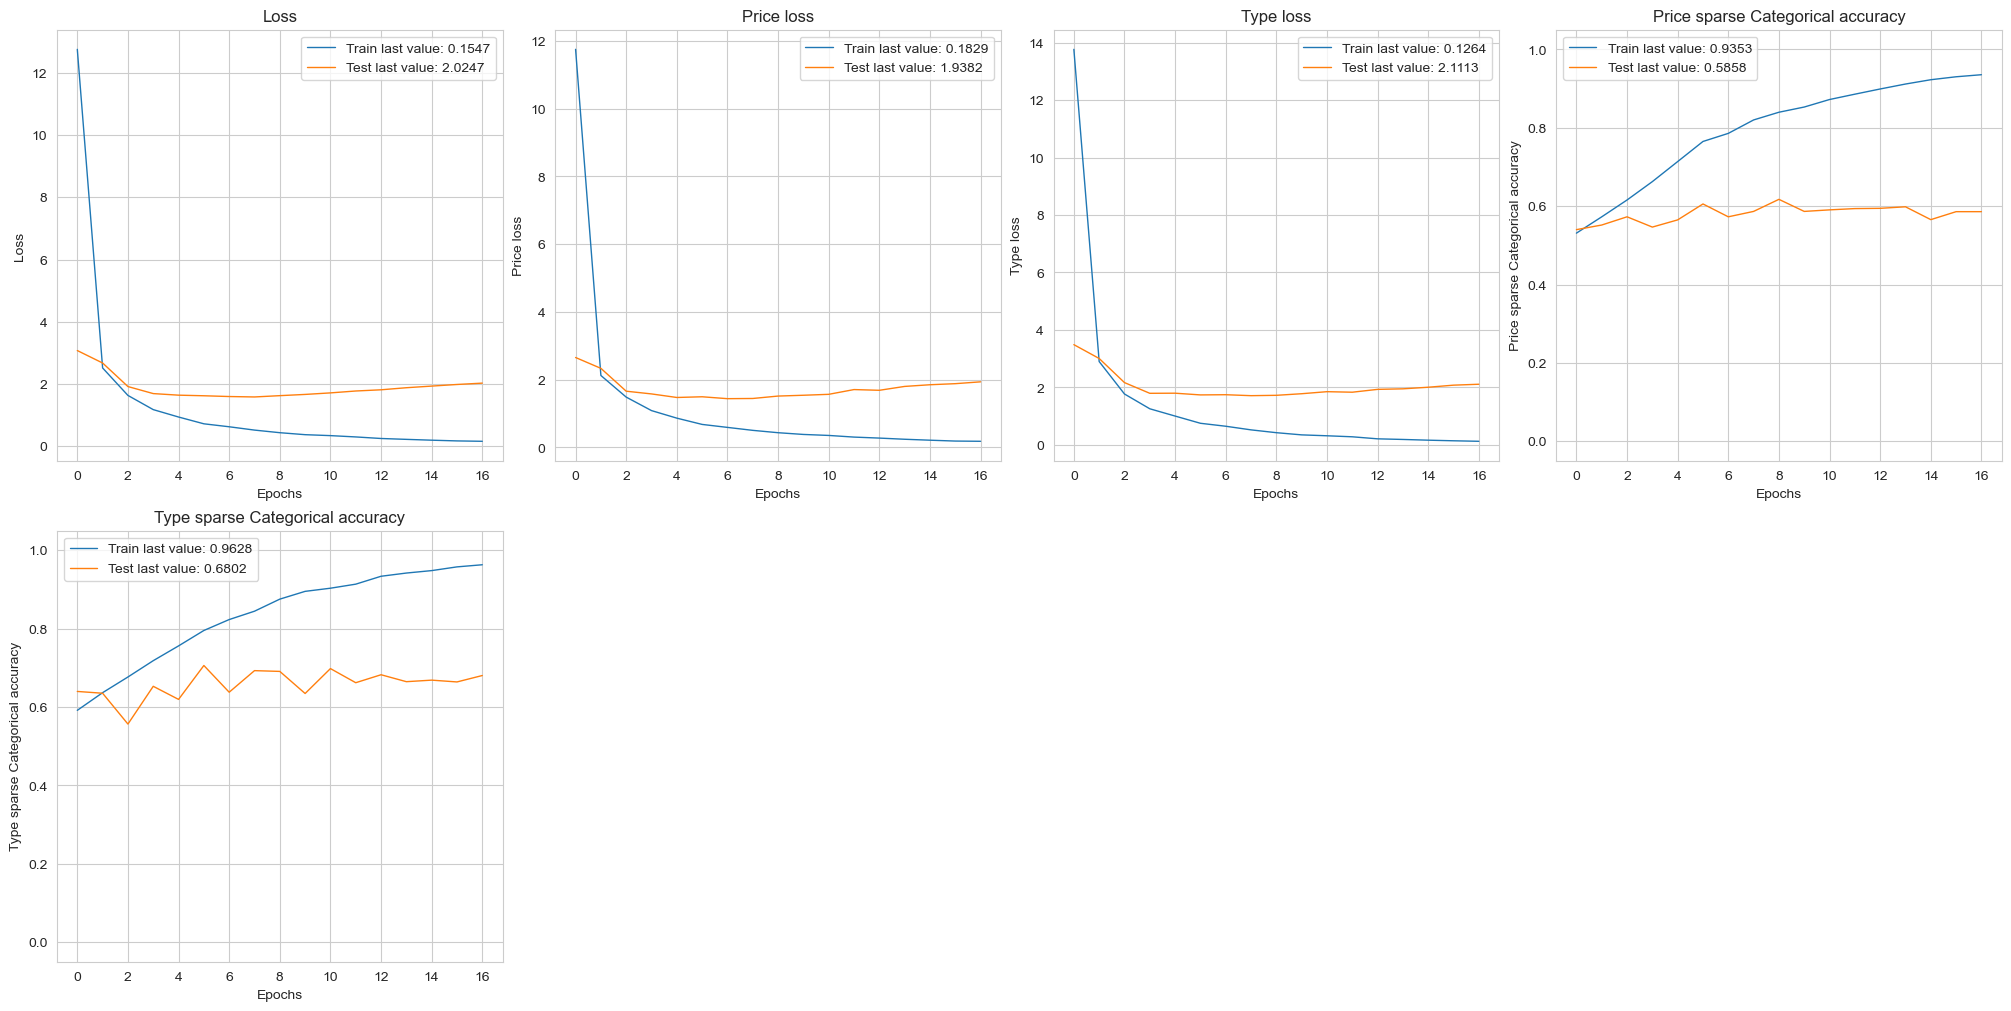

In [66]:
# plotting the losses and accuracies

plot_history(history)

In [67]:
# generate predictions and submit to Kaggle
test(bi_lstm_model,'submission2')

230/230 [==============================] - 3s 9ms/step


# Observation

After submit the file to kaggle it got me 0.60326 as a public score , still not that good too.

Let's try another approach

# Trial 3
## GRU , Let's try just a GRU layer instead

## Define The model

In [68]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# lstm = LSTM(50)(embedded)  , just replace LSTM with GRU
lstm = GRU(20)(embedded) # fewer hidden units might improve training time?

# image part
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16x16 mask, reducing the size to 3x3x32
flattened = Flatten()(pl) # flatten the shape


# fusion:
fused = tf.concat([lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [69]:
# model definition
gru_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [70]:
# compile this new model including the GRU layer and print the architecture
compile(gru_model)
gru_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 49, 49, 32)   16416       ['input_10[0][0]']               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 100)     4000000     ['input_9[0][0]']                
                                                                                            

In [71]:
# train with the same hyperparameters in the template, 20 epochs with a batch size of 16
history = train(gru_model, callbacks)

Epoch 1/20
382/382 [==============================] - 20s 48ms/step - loss: 26.4717 - price_loss: 19.8374 - type_loss: 33.1059 - price_sparse_categorical_accuracy: 0.5220 - type_sparse_categorical_accuracy: 0.5919 - val_loss: 12.3591 - val_price_loss: 10.8684 - val_type_loss: 13.8498 - val_price_sparse_categorical_accuracy: 0.4535 - val_type_sparse_categorical_accuracy: 0.6625
Epoch 2/20
382/382 [==============================] - 19s 49ms/step - loss: 9.3516 - price_loss: 6.7568 - type_loss: 11.9464 - price_sparse_categorical_accuracy: 0.5165 - type_sparse_categorical_accuracy: 0.6010 - val_loss: 9.2178 - val_price_loss: 7.6010 - val_type_loss: 10.8346 - val_price_sparse_categorical_accuracy: 0.4672 - val_type_sparse_categorical_accuracy: 0.4941
Epoch 3/20
382/382 [==============================] - 20s 52ms/step - loss: 7.2190 - price_loss: 5.1904 - type_loss: 9.2476 - price_sparse_categorical_accuracy: 0.5216 - type_sparse_categorical_accuracy: 0.6006 - val_loss: 5.9562 - val_price_lo

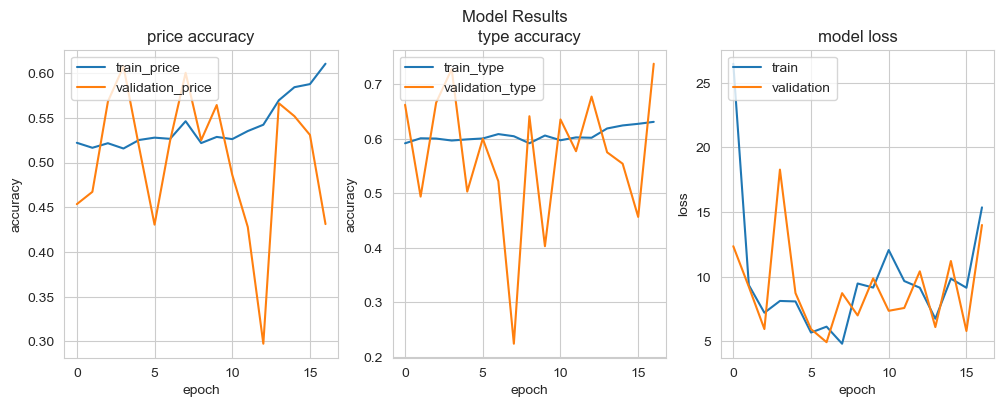

In [72]:
# Looking at the results, we can see that the training accuracy improves and the loss curve is smoother prior to overfitting around epoch 8
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

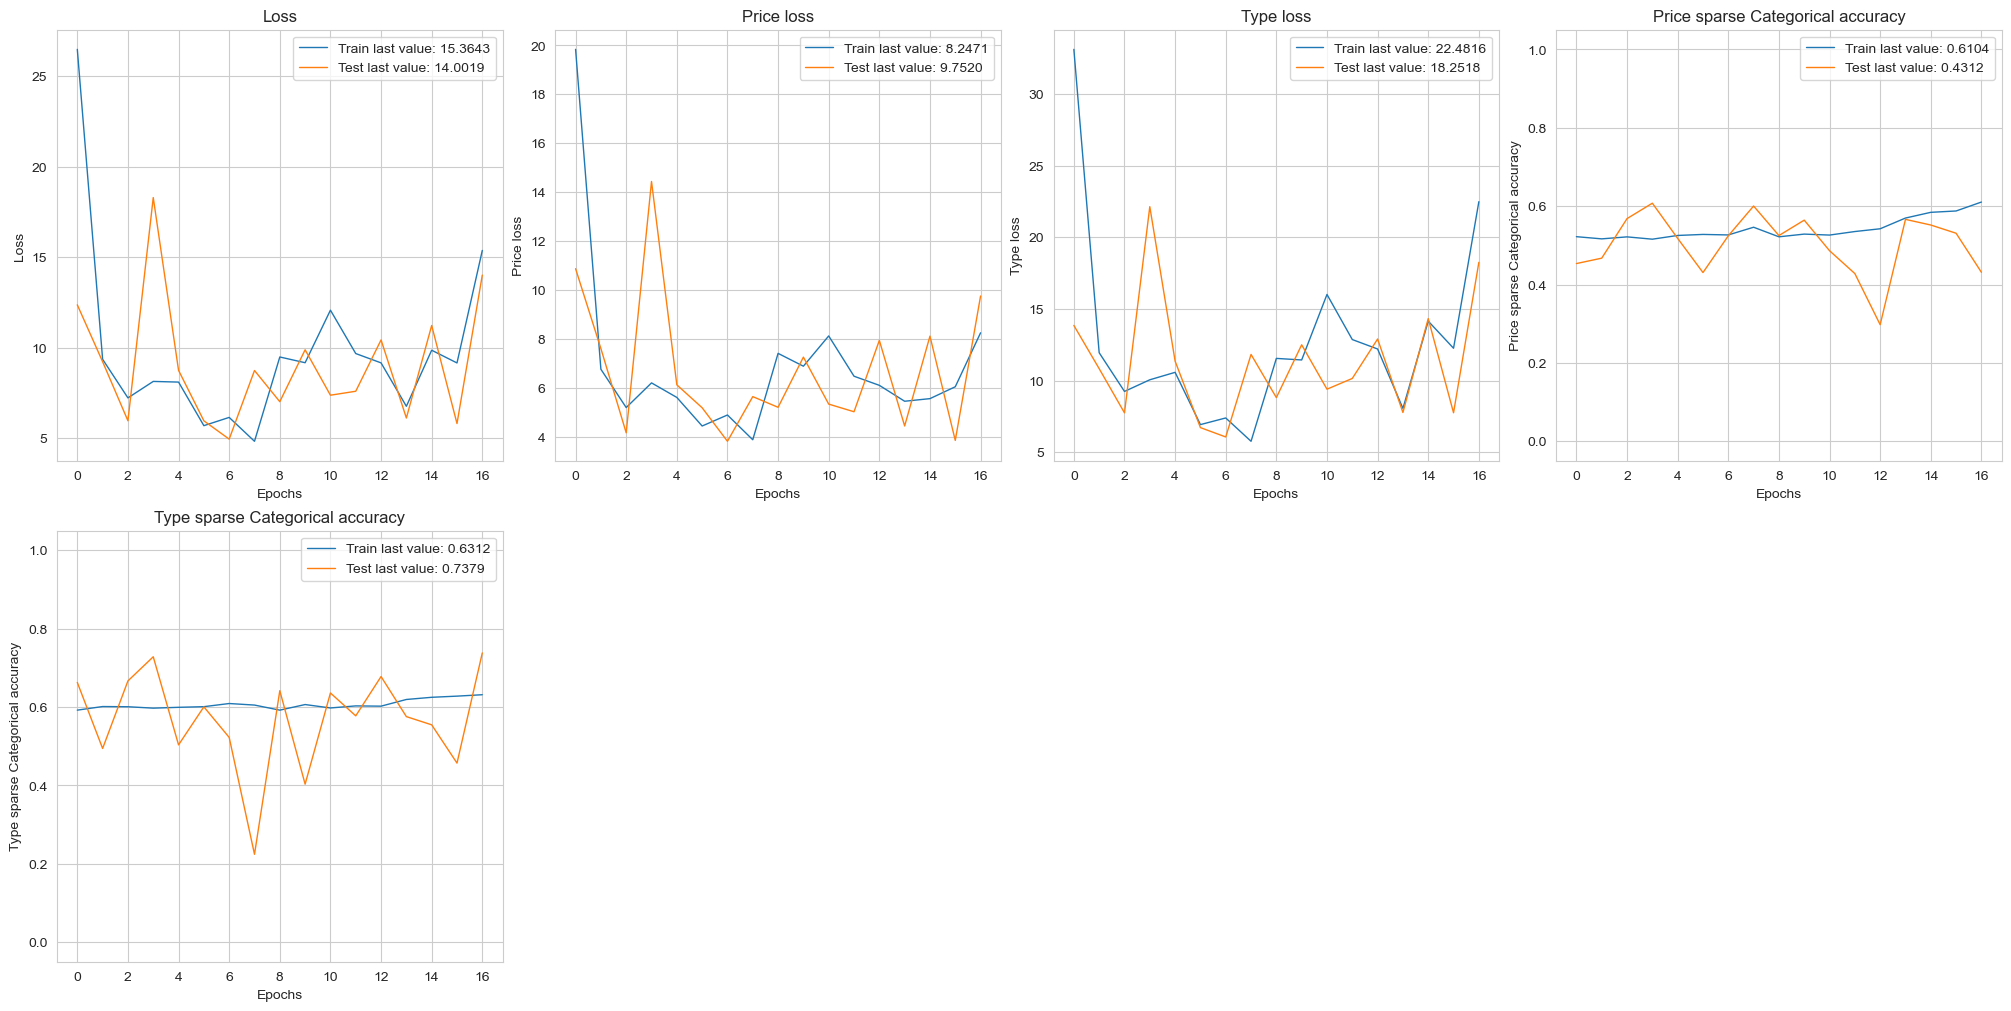

In [73]:
# plotting the history
plot_history(history)

In [74]:
# generate predictions and submit to Kaggle
test(gru_model,'submission3')

230/230 [==============================] - 3s 11ms/step


# Observation

After submit the file to kaggle it got me 0.45163 as a public score , a very very bad result :(

Let's try another approach

## Trial 4 - Regularization using Dropout, L2

Add drop-out regularization in the image component of the model to reduce the overfitting.

Also using L2 recurrent regularization on the text component of the model.

# Define the Model

In [76]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm = Bidirectional(GRU(20, recurrent_regularizer='l2'))(embedded) # adding quadratic regularizer

# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
drop = Dropout(0.2)(cov) # 20% dropout
pl = MaxPool2D((3, 3))(drop) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
drop2 = Dropout(0.2)(cov2) # 20% dropout
pl2 = MaxPool2D((2,2))(drop2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [77]:
# model definition
bi_lstm_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [78]:
# compiling the bidirectional model (with regularization) and printing a summary of the architecture
compile(bi_lstm_model)
bi_lstm_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 62, 62, 32)   608         ['input_12[0][0]']               
                                                                                                  
 dropout (Dropout)              (None, 62, 62, 32)   0           ['conv2d_5[0][0]']               
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 20, 20, 32)  0           ['dropout[0][0]']                
                                                                                            

In [79]:
# increasing the batch size to 64 to improve training speed, still 20 epochs
history = train(bi_lstm_model, callbacks, 20, 64) # using a batch size of 64 to speed up training

Epoch 1/20
96/96 [==============================] - 11s 89ms/step - loss: 13.7652 - price_loss: 13.7135 - type_loss: 13.3509 - price_sparse_categorical_accuracy: 0.4927 - type_sparse_categorical_accuracy: 0.5853 - val_loss: 10.0192 - val_price_loss: 4.6964 - val_type_loss: 15.1044 - val_price_sparse_categorical_accuracy: 0.4817 - val_type_sparse_categorical_accuracy: 0.1586
Epoch 2/20
96/96 [==============================] - 8s 86ms/step - loss: 4.2485 - price_loss: 4.0505 - type_loss: 4.2928 - price_sparse_categorical_accuracy: 0.5209 - type_sparse_categorical_accuracy: 0.6015 - val_loss: 7.2540 - val_price_loss: 2.9896 - val_type_loss: 11.4070 - val_price_sparse_categorical_accuracy: 0.4980 - val_type_sparse_categorical_accuracy: 0.1723
Epoch 3/20
96/96 [==============================] - 9s 91ms/step - loss: 2.8056 - price_loss: 2.7012 - type_loss: 2.8201 - price_sparse_categorical_accuracy: 0.5673 - type_sparse_categorical_accuracy: 0.6397 - val_loss: 4.6964 - val_price_loss: 3.0139

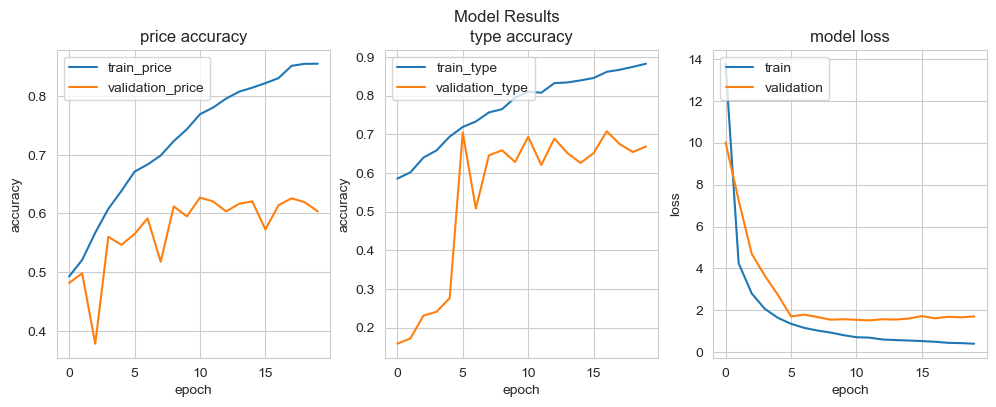

In [80]:
# still overfitting, but the curves are much smoother, as expected
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

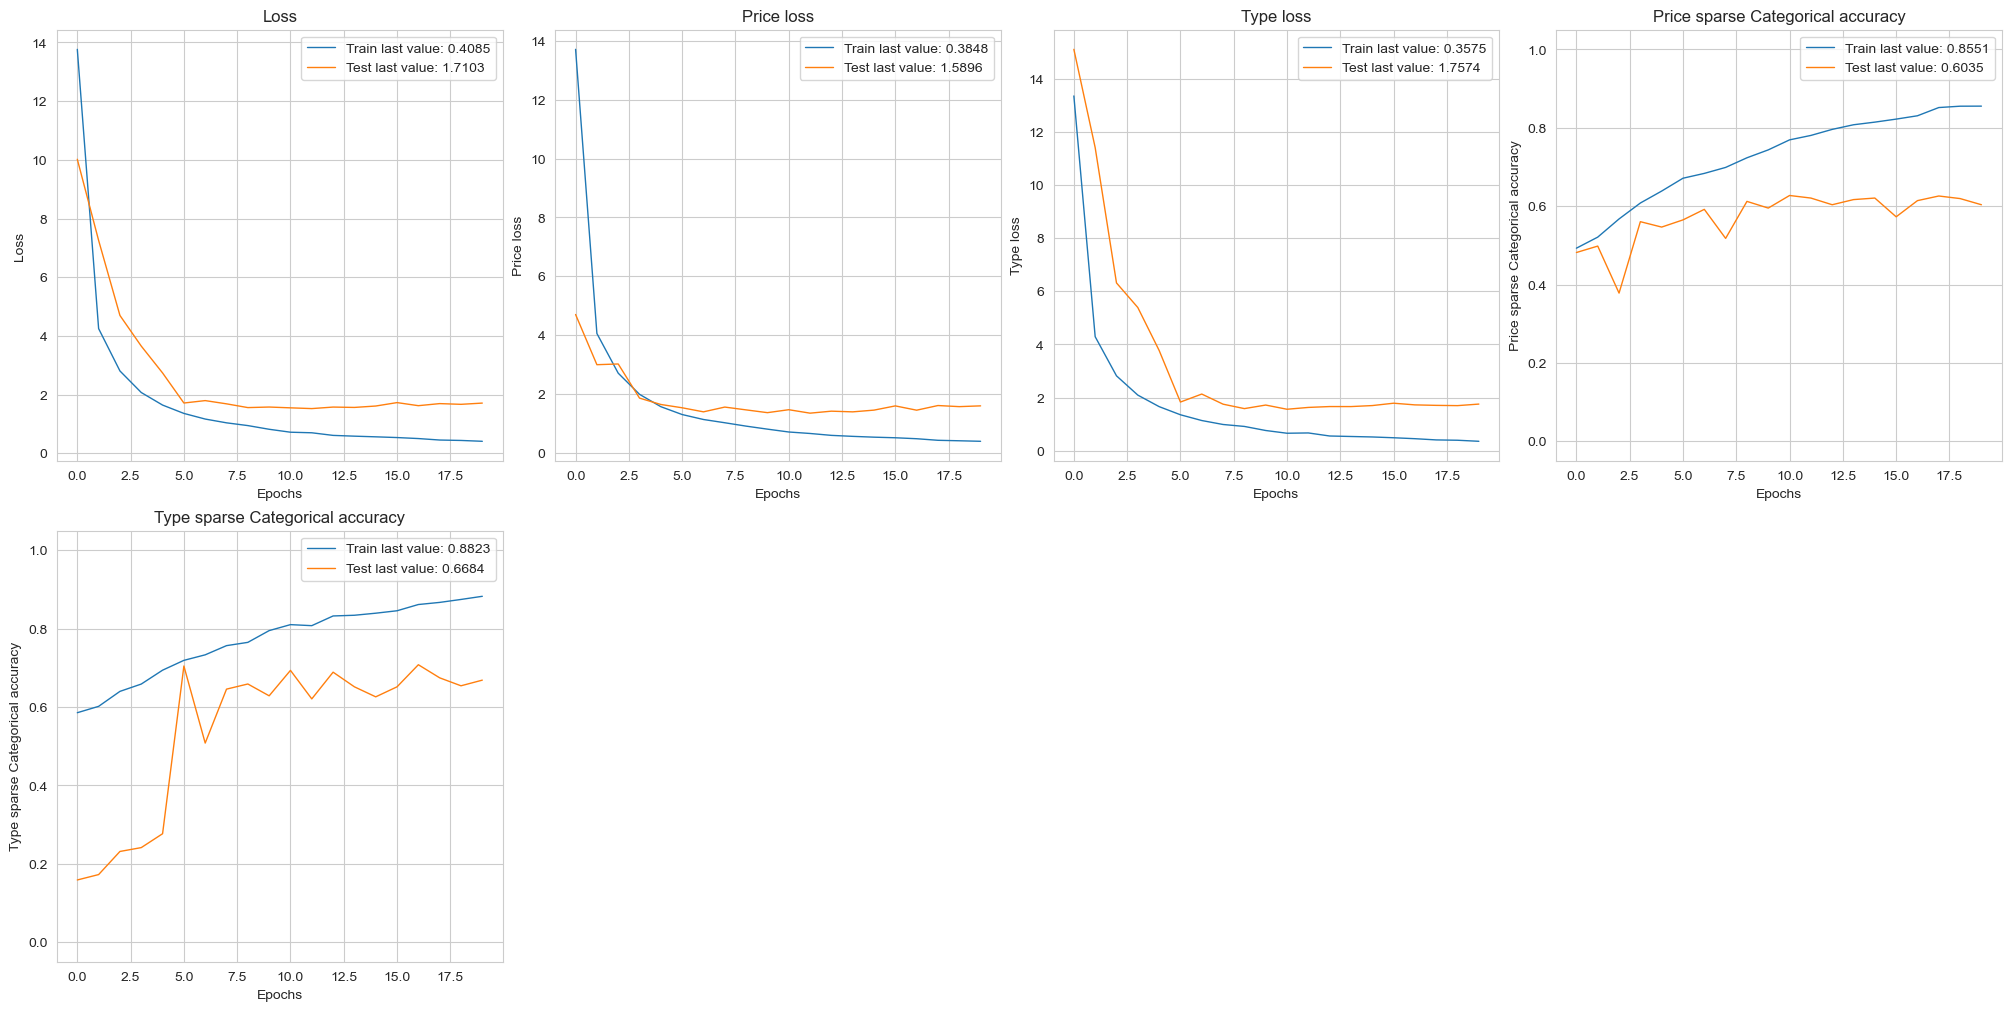

In [81]:
plot_history(history)

In [82]:
# generate predictions and submit to Kaggle
test(bi_lstm_model,'submission4')

230/230 [==============================] - 3s 9ms/step


# Observations

After submit the file to kaggle it got me 0.61141 as a public score , the best of them till now but still needs to be improved.

Let's try another approach

## Trial 5 - Changing Architecture and Hyperparameters

I'll experiment with different architectural changes as the model is overfitting.

In [84]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings, 40000x100
conv1 = Conv1D(filters=32, kernel_size=5, strides=1, activation='relu')(embedded)
pool = MaxPool1D(pool_size=5)(conv1)
bi_lstm = Bidirectional(GRU(20, recurrent_regularizer='l2'))(pool)

# image part
cov = Conv2D(64, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
drop = Dropout(0.2)(cov) # 20% dropout, tried vals of: 0, 0.2, 0.3, 0.5
pl = MaxPool2D((3, 3))(drop) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
drop2 = Dropout(0.2)(cov2) # 20% dropout, tried vals of: 0, 0.2, 0.3, 0.5
pl2 = MaxPool2D((2,2))(drop2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [85]:
# model definition
bi_lstm_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [86]:
# compiling the bidirectional model (with regularization) and printing a summary of the architecture
compile(bi_lstm_model)
bi_lstm_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 62, 62, 64)   1216        ['input_14[0][0]']               
                                                                                                  
 dropout_2 (Dropout)            (None, 62, 62, 64)   0           ['conv2d_7[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 100)]        0           []                               
                                                                                            

In [87]:
# I tried batch sizes of 16, 32, and 64. This configuration worked the best.
history = train(bi_lstm_model, callbacks, 20, 32)

Epoch 1/20
191/191 [==============================] - 18s 75ms/step - loss: 8.3554 - price_loss: 7.2146 - type_loss: 9.1890 - price_sparse_categorical_accuracy: 0.4970 - type_sparse_categorical_accuracy: 0.5789 - val_loss: 5.9809 - val_price_loss: 5.2425 - val_type_loss: 6.6367 - val_price_sparse_categorical_accuracy: 0.3702 - val_type_sparse_categorical_accuracy: 0.3218
Epoch 2/20
191/191 [==============================] - 14s 75ms/step - loss: 2.7481 - price_loss: 2.4227 - type_loss: 3.0342 - price_sparse_categorical_accuracy: 0.5707 - type_sparse_categorical_accuracy: 0.6219 - val_loss: 4.3575 - val_price_loss: 1.7560 - val_type_loss: 6.9377 - val_price_sparse_categorical_accuracy: 0.5374 - val_type_sparse_categorical_accuracy: 0.1193
Epoch 3/20
191/191 [==============================] - 15s 77ms/step - loss: 1.8464 - price_loss: 1.5491 - type_loss: 2.1202 - price_sparse_categorical_accuracy: 0.6296 - type_sparse_categorical_accuracy: 0.6594 - val_loss: 2.0776 - val_price_loss: 1.49

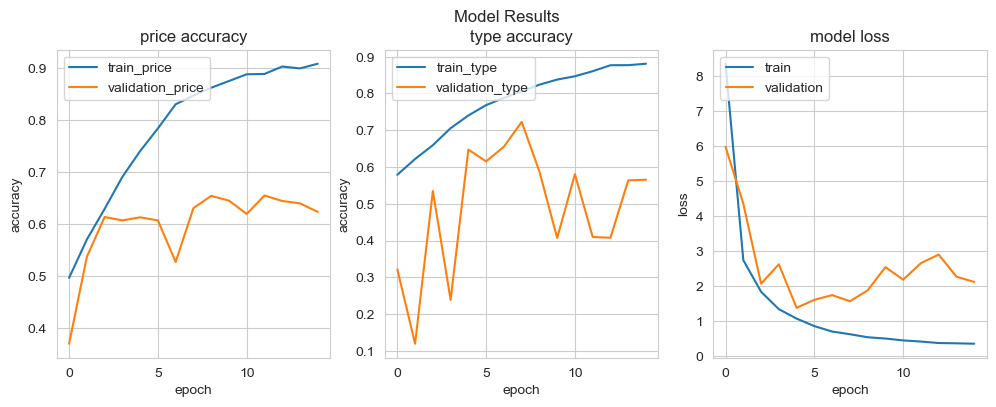

In [88]:
# noisy validation curves again. What gives?
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

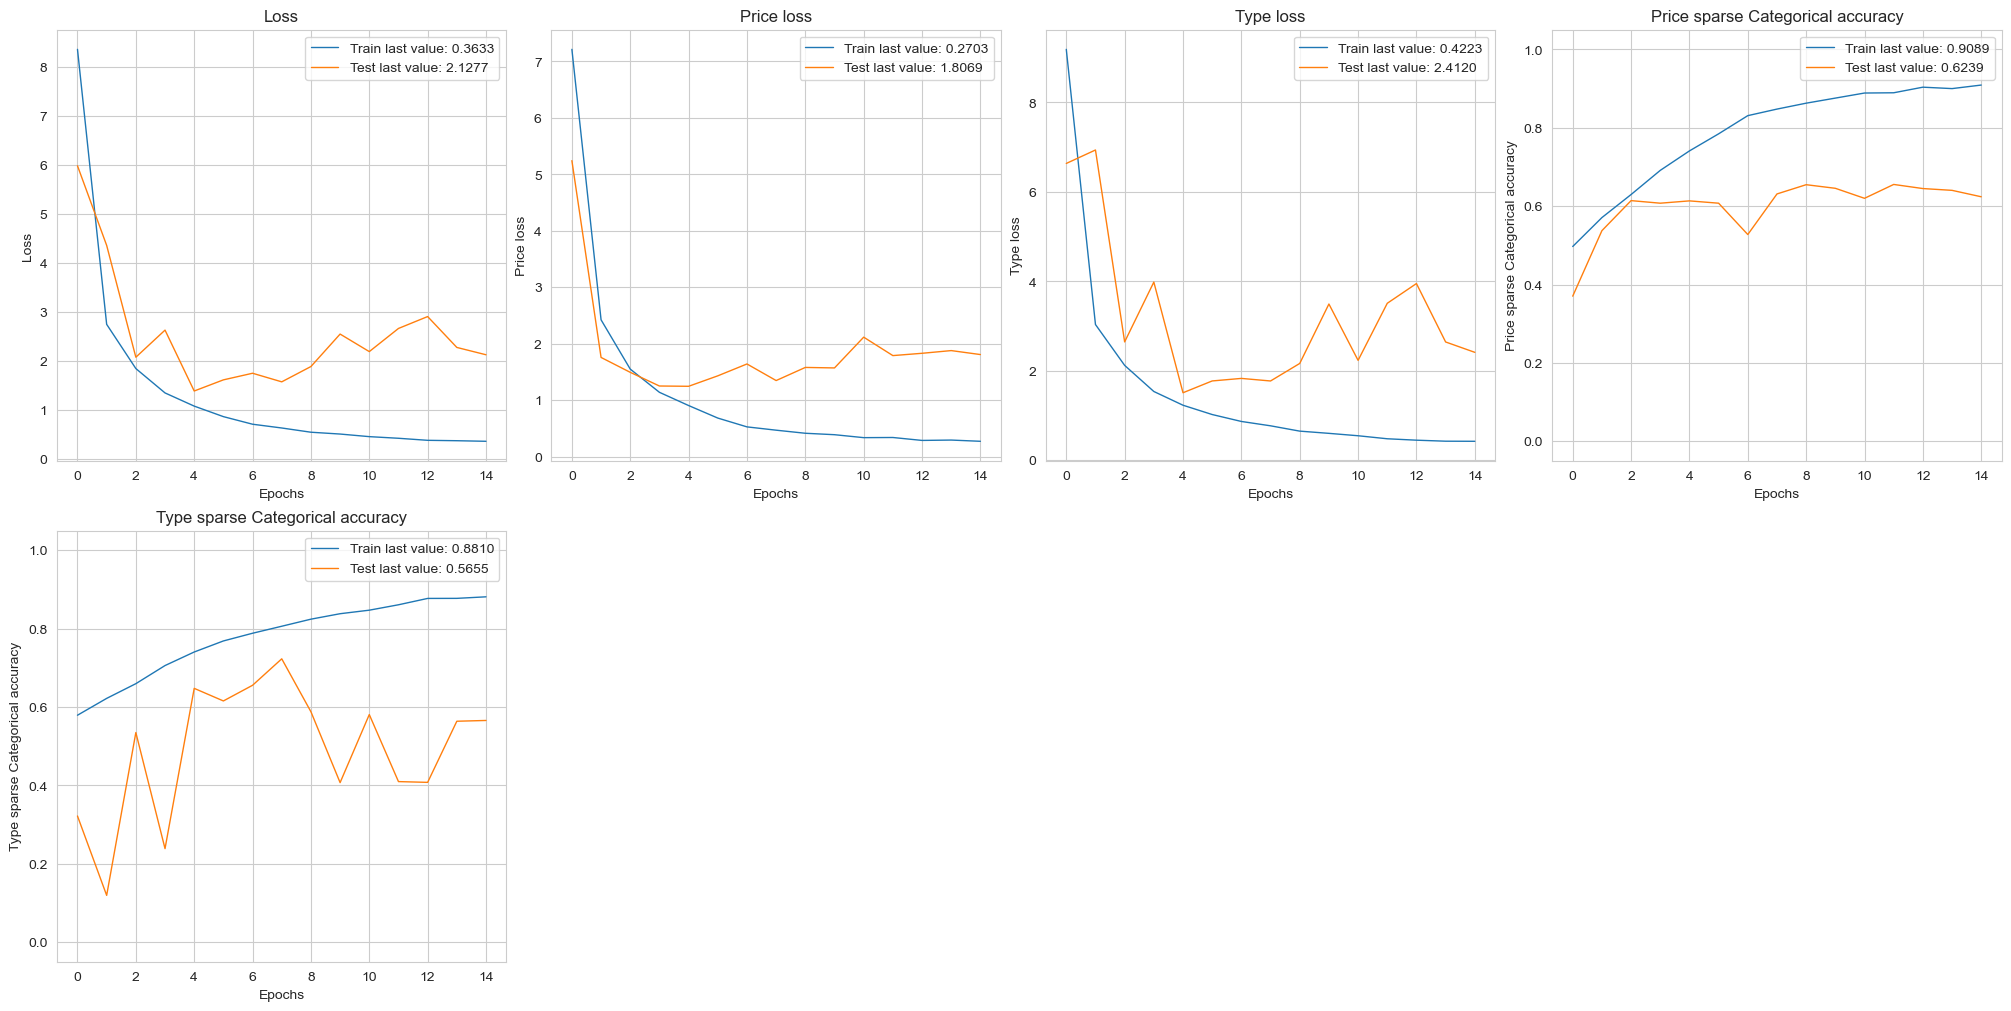

In [89]:
plot_history(history)

In [90]:
# generate predictions and submit to Kaggle
test(bi_lstm_model,'submission5')

230/230 [==============================] - 2s 9ms/step


# Observations

After submit the file to kaggle it got me 0.63097 as a public score , a good result (kinda) , but let's try another approach and see ..

# Trial 6 - Transformers: Experimenting with Self-Attention

try using self-attention next (via a multi-head attention layer) on the text component of the network.

# Define the Model

In [92]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# adopted the following to create an attention mechanism: https://discuss.pytorch.org/t/trying-to-understand-nn-multiheadattention-coming-from-keras/122923
attention = MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm = Bidirectional(GRU(20, recurrent_regularizer='l2'))(attention)


# image part
cov = Conv2D(64, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
drop = Dropout(0.2)(cov) # 20% dropout, tried vals of: 0, 0.2, 0.3, 0.5
pl = MaxPool2D((3, 3))(drop) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
drop2 = Dropout(0.2)(cov2) # 20% dropout, tried vals of: 0, 0.2, 0.3, 0.5
pl2 = MaxPool2D((2,2))(drop2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)


# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [93]:
# model definition
attn_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [94]:
# compiling the bidirectional model (with regularization and attention) 
# and printing a summary of the architecture
compile(attn_model)
attn_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 64)   1216        ['input_16[0][0]']               
                                                                                                  
 dropout_4 (Dropout)            (None, 62, 62, 64)   0           ['conv2d_9[0][0]']               
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 20, 20, 64)  0           ['dropout_4[0][0]']              
                                                                                            

In [95]:
history = train(attn_model, callbacks, 20, 32)

Epoch 1/20
191/191 [==============================] - 22s 95ms/step - loss: 9.3958 - price_loss: 9.6622 - type_loss: 8.8235 - price_sparse_categorical_accuracy: 0.5137 - type_sparse_categorical_accuracy: 0.5837 - val_loss: 3.4994 - val_price_loss: 3.0117 - val_type_loss: 3.9115 - val_price_sparse_categorical_accuracy: 0.4784 - val_type_sparse_categorical_accuracy: 0.6933
Epoch 2/20
191/191 [==============================] - 18s 94ms/step - loss: 3.1833 - price_loss: 2.9075 - type_loss: 3.4258 - price_sparse_categorical_accuracy: 0.5383 - type_sparse_categorical_accuracy: 0.6120 - val_loss: 4.1221 - val_price_loss: 2.4192 - val_type_loss: 5.8138 - val_price_sparse_categorical_accuracy: 0.5688 - val_type_sparse_categorical_accuracy: 0.4220
Epoch 3/20
191/191 [==============================] - 18s 94ms/step - loss: 2.1830 - price_loss: 2.0080 - type_loss: 2.3535 - price_sparse_categorical_accuracy: 0.5768 - type_sparse_categorical_accuracy: 0.6605 - val_loss: 1.6775 - val_price_loss: 1.46

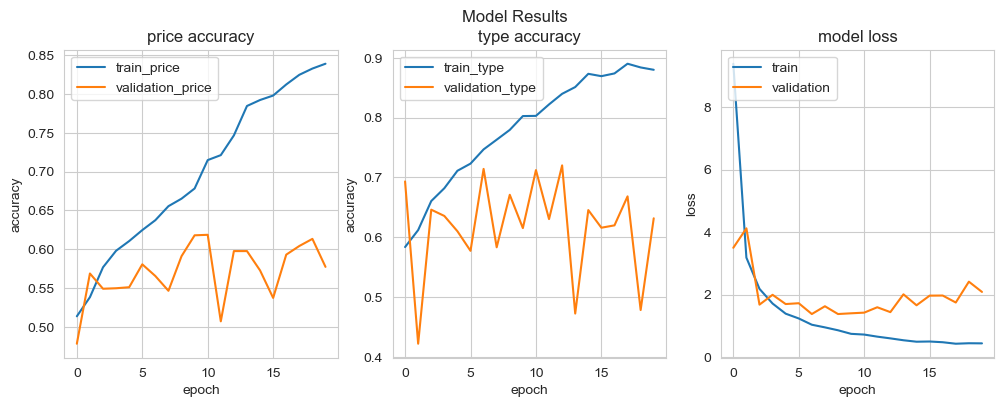

In [96]:
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

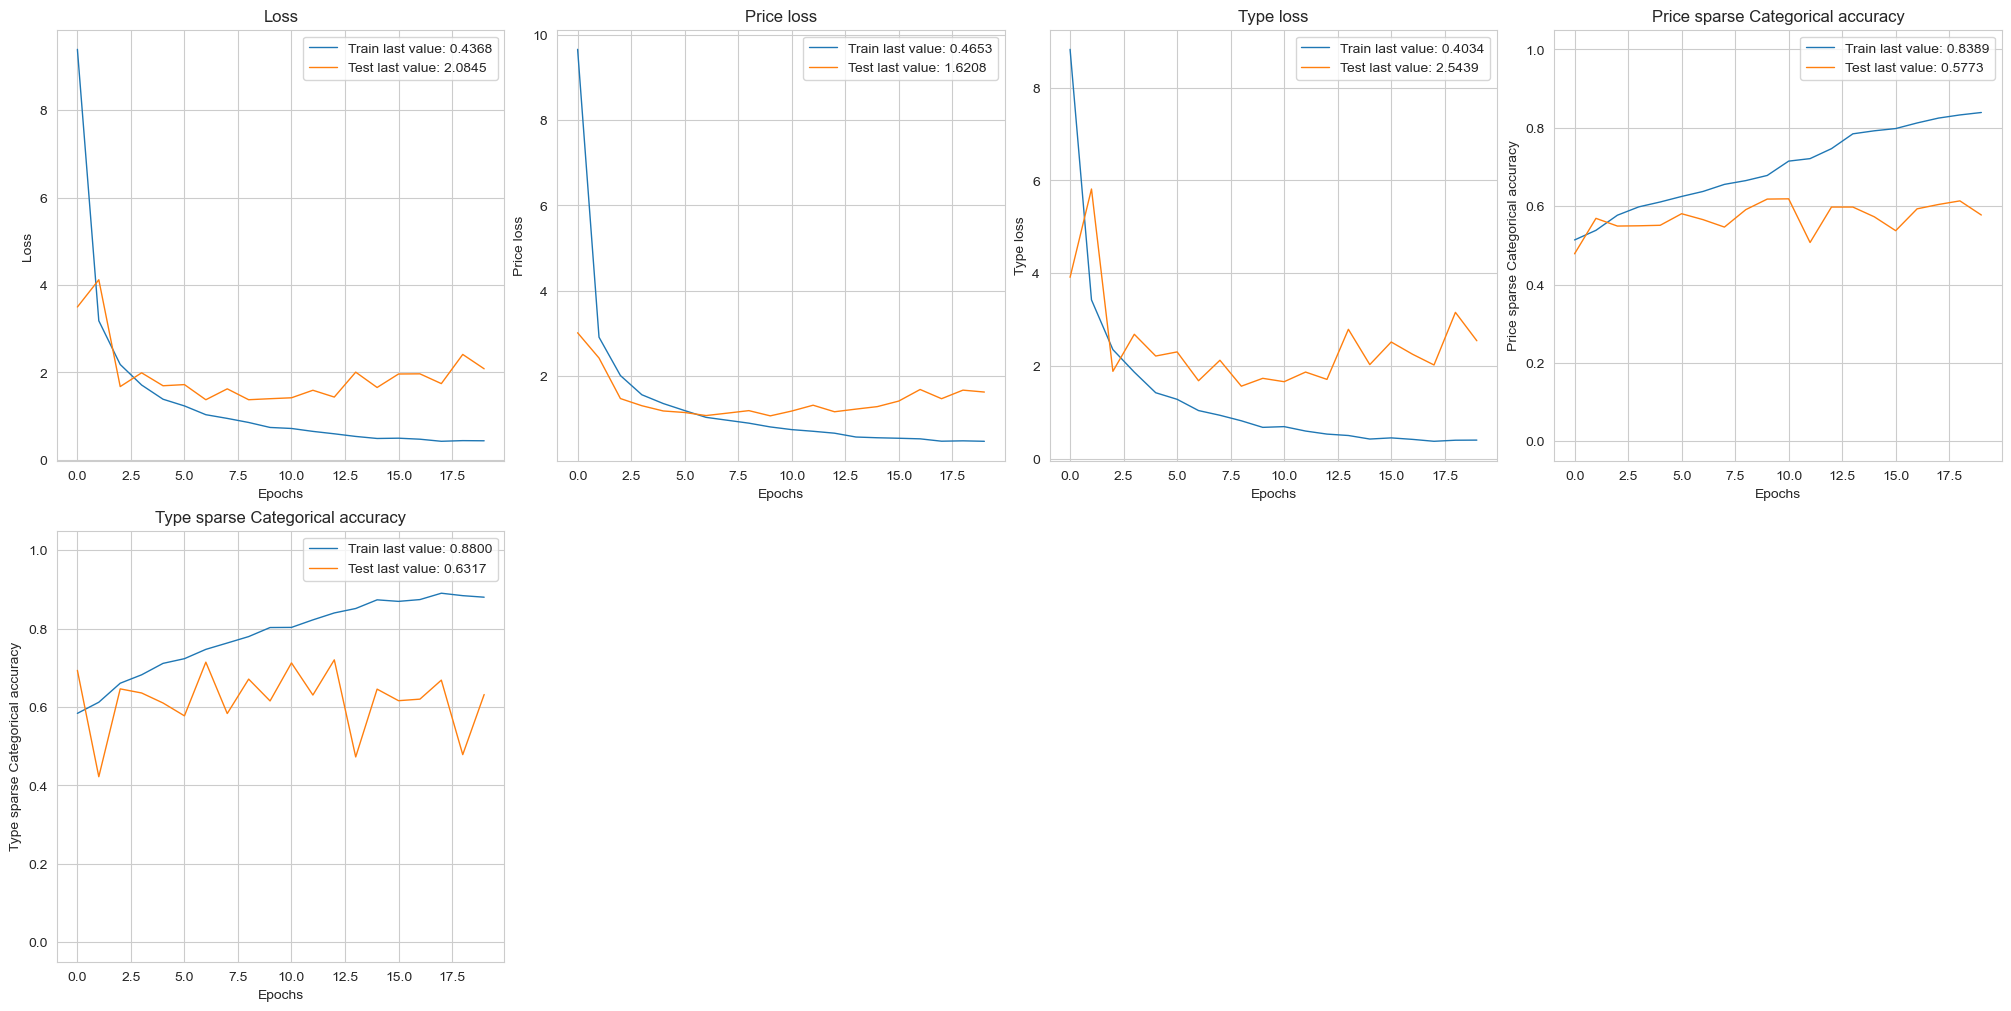

In [97]:
plot_history(history)

In [98]:
# generate predictions and submit to Kaggle
test(attn_model,'submission6')

230/230 [==============================] - 4s 14ms/step


# Observation

After submit the file to kaggle it got me 0.60081 as a public score , less than last one.

Let's try another and final approach

# Trail 7 : Transfer Learning 

VGG16 for Image Component

(6101, 64, 64, 3)
(1526, 64, 64, 3)


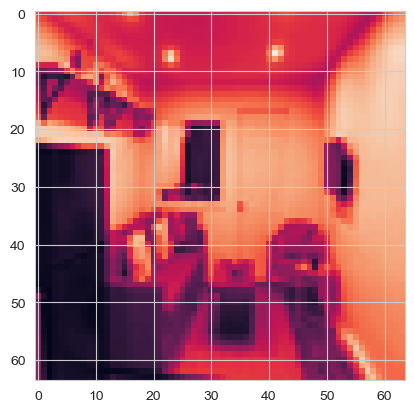

In [101]:
# VGG needs input images with 3 channels, so I'll extend the training data to have 3 channels and appear RGB
# x_tr_image is currently (6101, 64, 64, 2)
rgb_tr = x_tr_image[:,:,:,0]
rgb_vl = x_vl_image[:,:,:,0]
# rgb.shape # now it's (6101, 64, 64)
plt.imshow(rgb_tr[0, :, :]) # looks the same as it did before
rgb_tr = np.repeat(rgb_tr[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
rgb_vl = np.repeat(rgb_vl[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
print(rgb_tr.shape) # now we have 487 samples of (6101, 64, 64, 3)
print(rgb_vl.shape) # now we have 487 samples of (1526, 64, 64, 3)

In [102]:
# bringing VGG16 into the mix
base = VGG16(include_top=False, input_shape=(64,64,3)) # instantiating the base model we wish to tune
base.trainable = False # freezing the weights

# Build the Model

In [103]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 3)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
attention = MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm = Bidirectional(GRU(50, recurrent_regularizer='l2'))(attention)


# image part
scaling = Rescaling(1./127.5, offset=-1)(in_image) # rescaling to [-1,1] for VGG16
vgg = base(scaling, training=False) # pass the base model the scaled inputs
pl = GlobalAveragePooling2D()(vgg) # global average pooling, pretty much the same as flattening
do = Dropout(0.2)(pl) # dropout at a rate of 20%
fl = Flatten()(do) # flattening anyways


# fusion:
fused = tf.concat([bi_lstm, fl], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

In [104]:
# model definition
tl_model = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image # image inputs
    },
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type, # label 2: type category [0-23]
    },
)

In [105]:
# compiling the updated attention model and printing the summary
compile(tl_model)
tl_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 64, 64, 3)    0           ['input_19[0][0]']               
                                                                                                  
 input_18 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 vgg16 (Functional)             (None, 2, 2, 512)    14714688    ['rescaling[0][0]']              
                                                                                            

In [106]:
# history = train(lstm_model, callbacks)
history = tl_model.fit(
      # our inputs: tokenized text sequences and resized image samples
      x={
          'summary': x_tr_text_id,
          'image': rgb_tr # can't use my helper function as I have a different image input
      },
      # our outputs: price and rental type categories
      y={
          'price': y_tr_price,
          'type': y_tr_type,
      },
      epochs=20, # train for 20 epochs (iterations over all training data)
      batch_size=32, # batch size of 16 (samples processed before updating gradients)
      # our validation splits for our two input sets and our two target attributes
      validation_data=(
          {
              'summary': x_vl_text_id,
              'image': rgb_vl # can't use my helper function as I have a different validation set
          }, 
          {
              'price': y_vl_price,
              'type': y_vl_type,
          }),
      # validation_split=0.2, # validate on a hold-out set of 20%, even though splits were already created above???? This is redundant.
      # use early stopping, monitor the validation price loss and if it does not improve for 5 consecutive epochs, training will stop
      callbacks=[
          tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # setting patience back to 5
      ],
      verbose=1 # one line per epoch displaying performance metrics
  )

Epoch 1/20
191/191 [==============================] - 52s 257ms/step - loss: 1.3083 - price_loss: 0.8394 - type_loss: 1.2483 - price_sparse_categorical_accuracy: 0.6129 - type_sparse_categorical_accuracy: 0.7061 - val_loss: 0.9370 - val_price_loss: 0.8106 - val_type_loss: 1.0133 - val_price_sparse_categorical_accuracy: 0.6232 - val_type_sparse_categorical_accuracy: 0.7471
Epoch 2/20
191/191 [==============================] - 49s 257ms/step - loss: 0.8598 - price_loss: 0.7921 - type_loss: 0.9127 - price_sparse_categorical_accuracy: 0.6371 - type_sparse_categorical_accuracy: 0.7617 - val_loss: 0.8575 - val_price_loss: 0.7849 - val_type_loss: 0.9276 - val_price_sparse_categorical_accuracy: 0.6415 - val_type_sparse_categorical_accuracy: 0.7516
Epoch 3/20
191/191 [==============================] - 49s 255ms/step - loss: 0.7877 - price_loss: 0.7602 - type_loss: 0.8132 - price_sparse_categorical_accuracy: 0.6569 - type_sparse_categorical_accuracy: 0.7736 - val_loss: 0.8440 - val_price_loss: 0

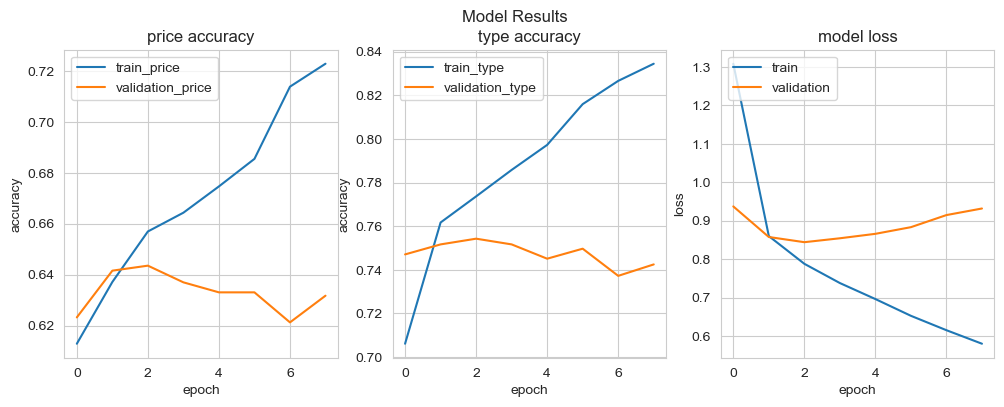

In [107]:
# this looks a lot better! Typical training/validation loss curve where we can see overfitting start to occur after just a few epochs
results_viz(history)

(<Figure size 2000x1000 with 8 Axes>,
 array([[<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
         <AxesSubplot:title={'center':'Price loss'}, xlabel='Epochs', ylabel='Price loss'>,
         <AxesSubplot:title={'center':'Type loss'}, xlabel='Epochs', ylabel='Type loss'>,
         <AxesSubplot:title={'center':'Price sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Price sparse Categorical accuracy'>],
        [<AxesSubplot:title={'center':'Type sparse Categorical accuracy'}, xlabel='Epochs', ylabel='Type sparse Categorical accuracy'>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

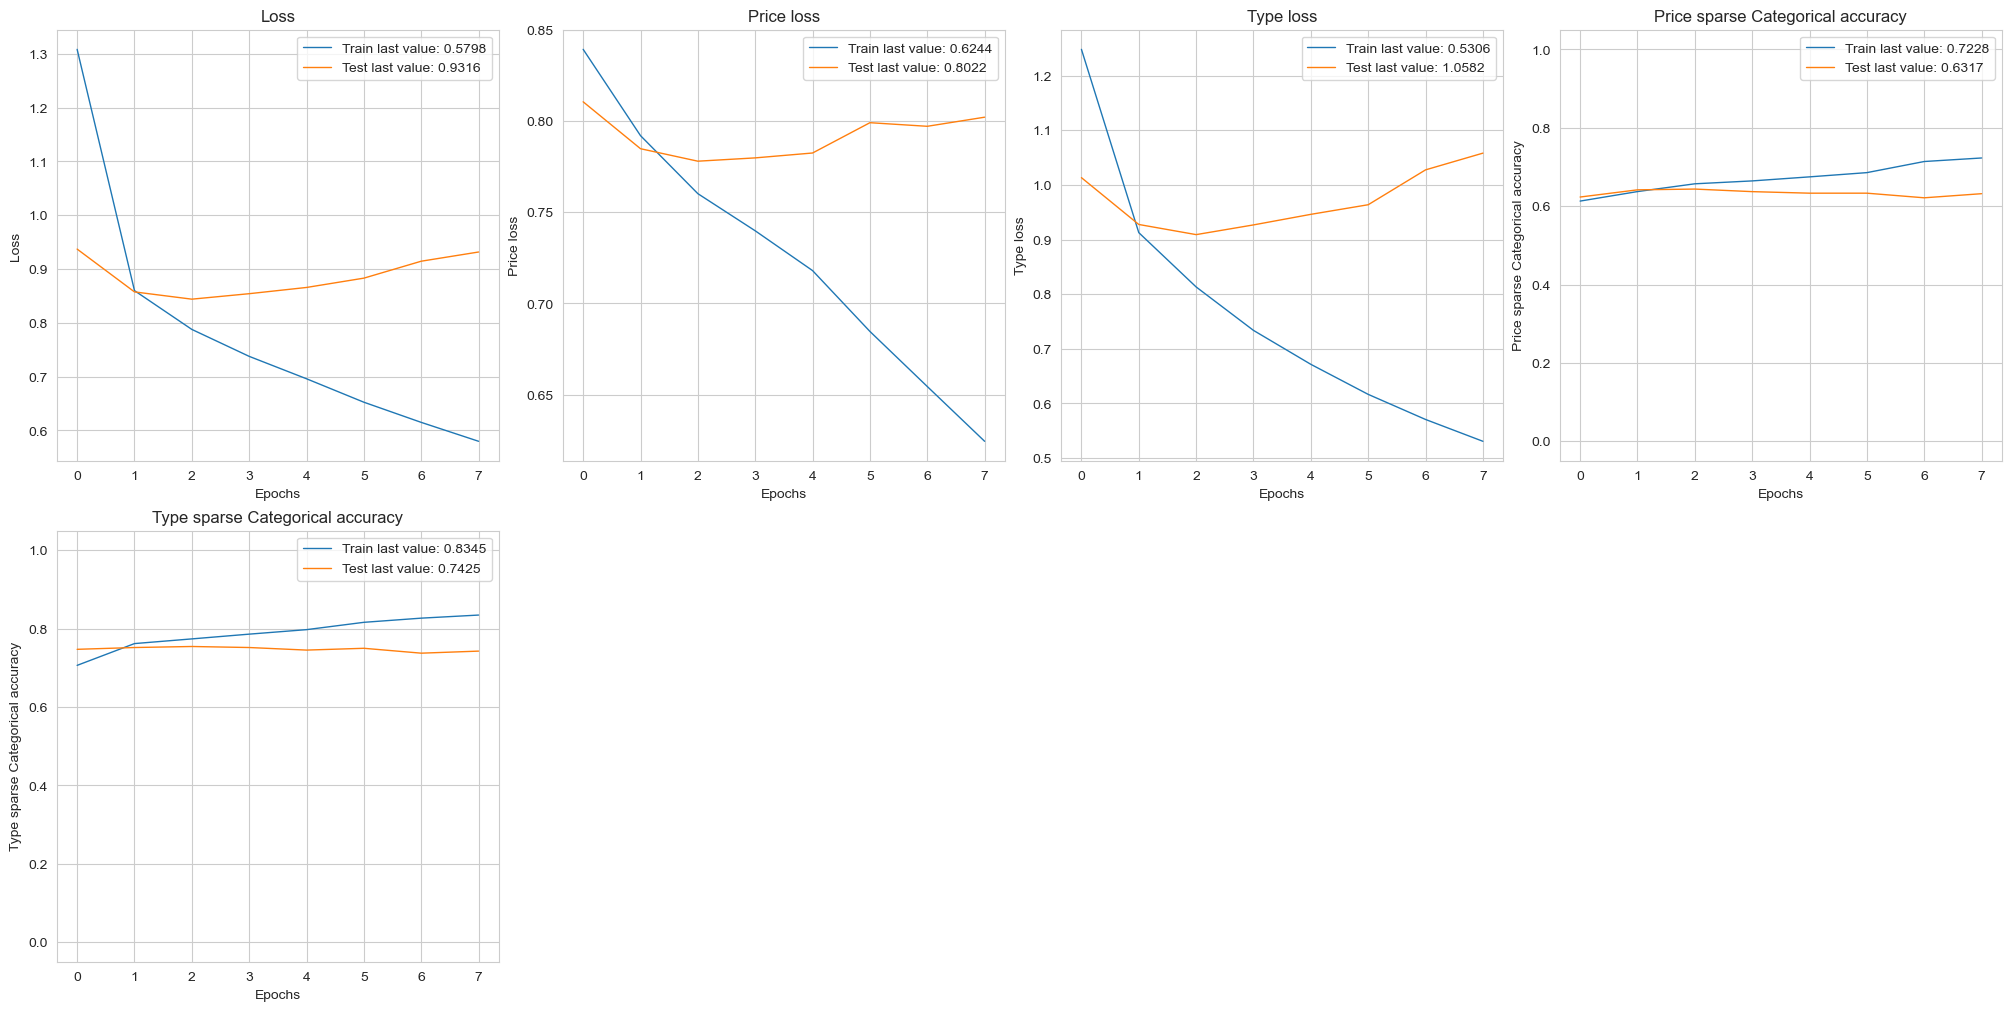

In [108]:
plot_history(history)

(7360, 64, 64, 3)


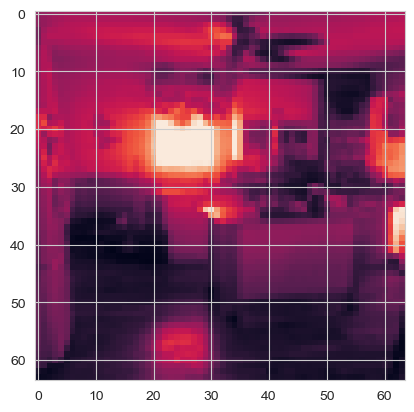

In [109]:
# preprocess the test images the same way as our training and validation sets
rgb_test = x_test_image[:,:,:,0]
plt.imshow(rgb_test[0, :, :]) # looks the same as it did before
rgb_test = np.repeat(rgb_test[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
print(rgb_test.shape) # now we have 487 samples of (7360,256,256,3)

In [112]:
# generate predictions and submit to Kaggle
# test(tl_model,'submission7')

# can't use test helper for this trial, ValueError: Input 0 of layer "model_8" is
# incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 64, 64, 2)

In [111]:
y_predict = tl_model.predict(
    {
        'summary': x_test_summary,
        'image': rgb_test
    }
)
price_predicted = y_predict['price'] 
price_category_predicted = np.argmax(price_predicted, axis=1) 

# create the submission dataframe/csv for submission
pd.DataFrame(
    {'id': x_test_df.id,
    'price': price_category_predicted}).to_csv('submission7.csv', index=False)

230/230 [==============================] - 37s 159ms/step


# Observation

After submit the file to kaggle it got me 0.6519 as a public score , the best score i got on public data for this competition.